# RDFIA: Practical work 1-ab
## Introduction to Neural Networks
### Sorbonne Université 2024
### [Course link](https://rdfia.github.io/)
### GRUSS Carlos, RCHAKI Oussama


### Imports

In [1]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

Download auxiliary functions and datasets:

In [2]:
######################################################################
# Uncomment the following if running on Google Colab
# !wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
# !unzip -j 2-ab.zip
# !wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

######################################################################
# Comment the following if on Google Colab
# Check if 2-ab.zip exists
if not os.path.exists("2-ab.zip"):
    print("Downloading 2-ab.zip")
    !wget https://github.com/rdfia/rdfia.github.io/raw/master/data/2-ab.zip
    # unzip 2-ab.zip
    !tar -xf 2-ab.zip --strip-components=1
# Check if utils-data.py exists
if not os.path.exists("utils-data.py"):
    print("Downloading utils-data.py")
    !wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-ab/utils-data.py

In [3]:
%run "utils-data.py"

### Part 1 : Forward and backward passes "by hands"

In [4]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by

    # All weights will be initialized according to a
    # normal distribution of mean 0 and standard deviation 0.3.

    # Wh: weights of the hidden layer (nh x nx)
    # Wy: weights of the output layer (ny x nh)
    # bh: bias of the hidden layer (1 x nh)
    # by: bias of the output layer (1 x ny)

    # std(kX) = |k| * std(X)
    params["Wh"] = 0.3 * torch.randn(nh, nx)
    params["Wy"] = 0.3 * torch.randn(ny, nh)
    # we consider the bias as a row vector
    params["bh"] = 0.3 * torch.randn(1, nh)
    # we consider the bias as a row vector
    params["by"] = 0.3 * torch.randn(1, ny)

    ####################
    ##      END        #
    ####################
    return params

In [5]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params["Wh"].size(0)
    ny = params["Wy"].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat

    outputs["X"] = X  # Shape (n_batch, nx)
    outputs["htilde"] = torch.mm(X, params["Wh"].T) + params["bh"].repeat(bsize, 1)  # Shape (n_batch, nh)
    outputs["h"] = torch.tanh(outputs["htilde"])  # Shape (n_batch, nh)
    outputs["ytilde"] = torch.mm(outputs["h"], params["Wy"].T) + params["by"].repeat(bsize, 1)  # Shape (n_batch, ny)
    outputs["yhat"] = torch.softmax(outputs["ytilde"], dim=1)  # Slice along dim sums to 1

    ####################
    ##      END        #
    ####################

    return outputs["yhat"], outputs

In [6]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    # Yhat/Y of shape (n_batch, ny)

    L = -torch.mean(torch.sum(torch.log(Yhat) * Y, dim=1), dim=0)

    _, inds_Y = torch.max(Y, 1)
    _, inds_pred = torch.max(Yhat, 1)
    acc = (torch.sum(inds_pred == inds_Y) / inds_Y.size(0)) * 100

    ####################
    ##      END        #
    ####################

    return L, acc

In [7]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    grad_ytilde = outputs["yhat"] - Y  # Shape (n_batch, ny)
    grads["Wy"] = torch.mm(grad_ytilde.T, outputs["h"])  # Shape (ny, nh)

    # Shape (n_batch, nh)
    grad_htilde = torch.mm(
        grad_ytilde, params["Wy"]) * (1 - torch.square(outputs["h"]))
    grads["Wh"] = torch.mm(grad_htilde.T, outputs["X"])  # Shape (nh, nx)

    grads["by"] = torch.sum(grad_ytilde, dim=0)  # Shape (1, ny)
    grads["bh"] = torch.sum(grad_htilde, dim=0)  # Shape (1, nh)

    ####################
    ##      END        #
    ####################
    return grads

In [8]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] -= eta*grads["Wh"]
    params["Wy"] -= eta*grads["Wy"]
    params["bh"] -= eta*grads["bh"]
    params["by"] -= eta*grads["by"]

    ####################
    ##      END        #
    ####################
    return params

#### Global learning procedure "by hands"

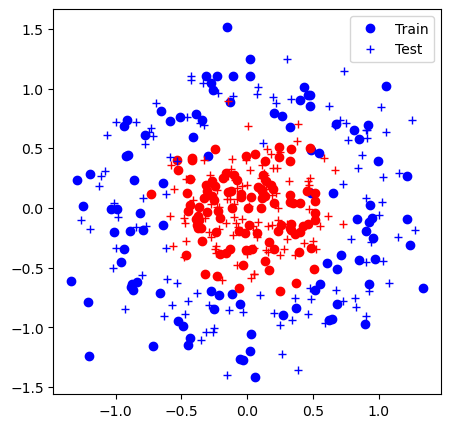

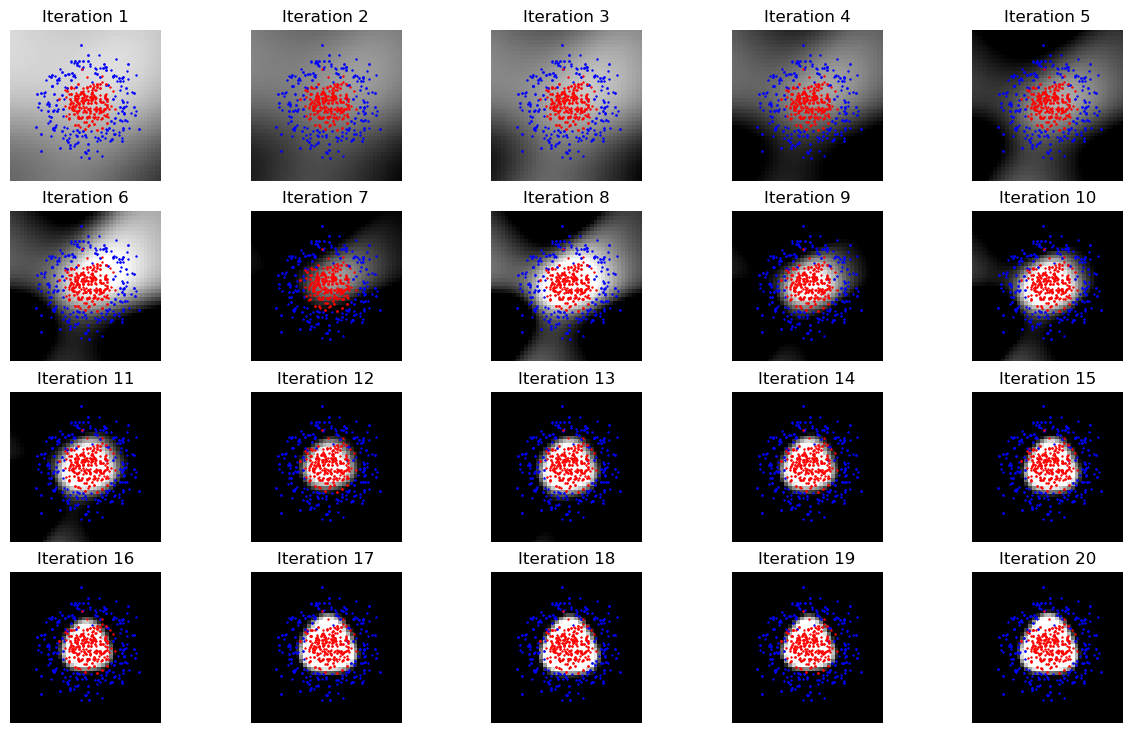

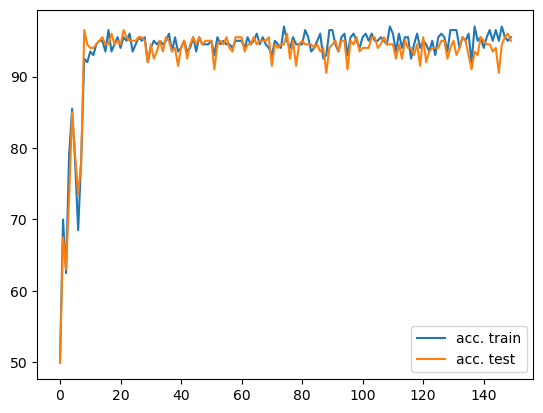

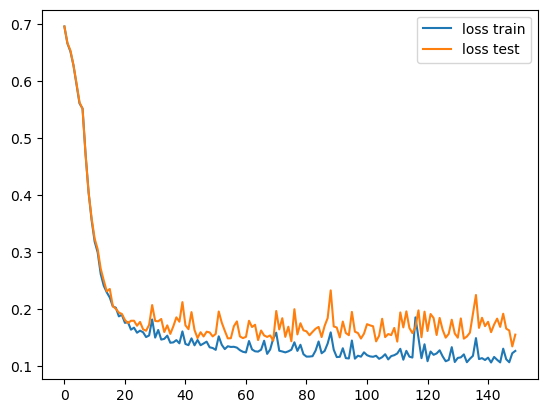

In [9]:
verbose = False
subplot = True

# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03
n_iter = 150

params = init_params(nx, nh, ny)

curves = [[], [], [], []]

if subplot:
    # Create the figure once, outside the loop
    plt.figure(figsize=(15, 9))
    plt.tight_layout()

# epoch
for iteration in range(n_iter):
    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################

    # batches

    for j in range(N // Nbatch):
        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd

        Yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(Yhat, Y)
        grads = backward(params, outputs, Y)
        params = sgd(params, grads, eta)

    ####################
    ##      END        #
    ####################

    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    # Save the results    
    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

    # Display the results (various options)
    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest)

    if verbose:
        print(title)
        data.plot_data_with_grid(Ygrid, title)
    
    if subplot:
        # Create a 3x5 grid of subplots - plot every 10 iterations
        if iteration < 20:
            plt.subplot(4, 5, iteration+1)
            Ygrid = Ygrid[:,1].numpy()
            plt.imshow(np.reshape(Ygrid, (40,40)), cmap='gray')
            plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train", markersize=1)
            plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro', markersize=1)
            plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test", markersize=1)
            plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+', markersize=1)
            plt.xlim(0,39)
            plt.ylim(0,39)
            plt.clim(0.3,0.7)
            plt.title(f'Iteration {iteration+1}')
            plt.axis('off')
            plt.xticks([])
            plt.yticks([])
            plt.draw()

if subplot:
    # Display the figure after all subplots have been added
    plt.show()

# Plot accuracy progress
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.legend()
plt.show()

# Plot loss progress
fig = plt.figure()
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

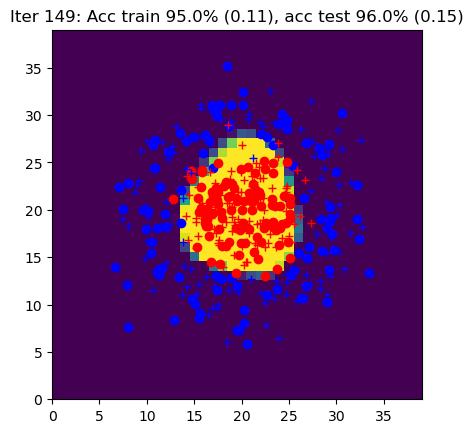

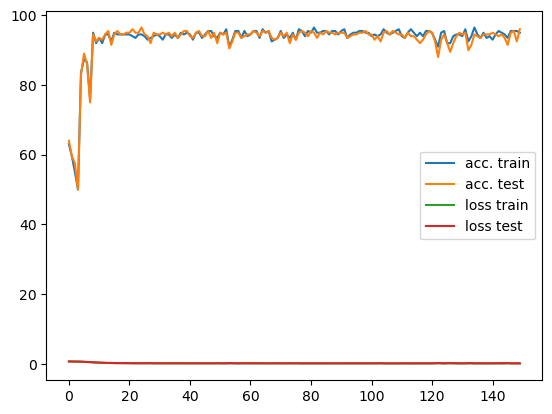

In [10]:
# init
from IPython.display import clear_output
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)


curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
        """
        outputs["X"]=outputs["X"].T
        outputs["htilde"]=outputs["htilde"].T
        outputs["h"]=outputs["h"].T
        outputs["ytilde"]=outputs["ytilde"].T
        outputs["yhat"]=outputs["yhat"].T
        """
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd
        # forward pass
        #print(f"Wh shape: {params['Wh'].shape}, X shape: {X.shape}, bh shape: {params['bh'].shape}")

        Yhat, outputs = forward(params, X)

        # calculate the loss
        L, acc = loss_accuracy(Yhat, Y)

        # backward pass
        grads = backward(params, outputs, Y)

        # step trought sgd
        params = sgd(params, grads, eta)


    ####################
    ##      END        #
    ####################

    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = f"Iter {iteration}: Acc train {acctrain:.1f}% ({Ltrain:.2f}), acc test {acctest:.1f}% ({Ltest:.2f})"
    print(title)
    clear_output(wait=True)
    data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

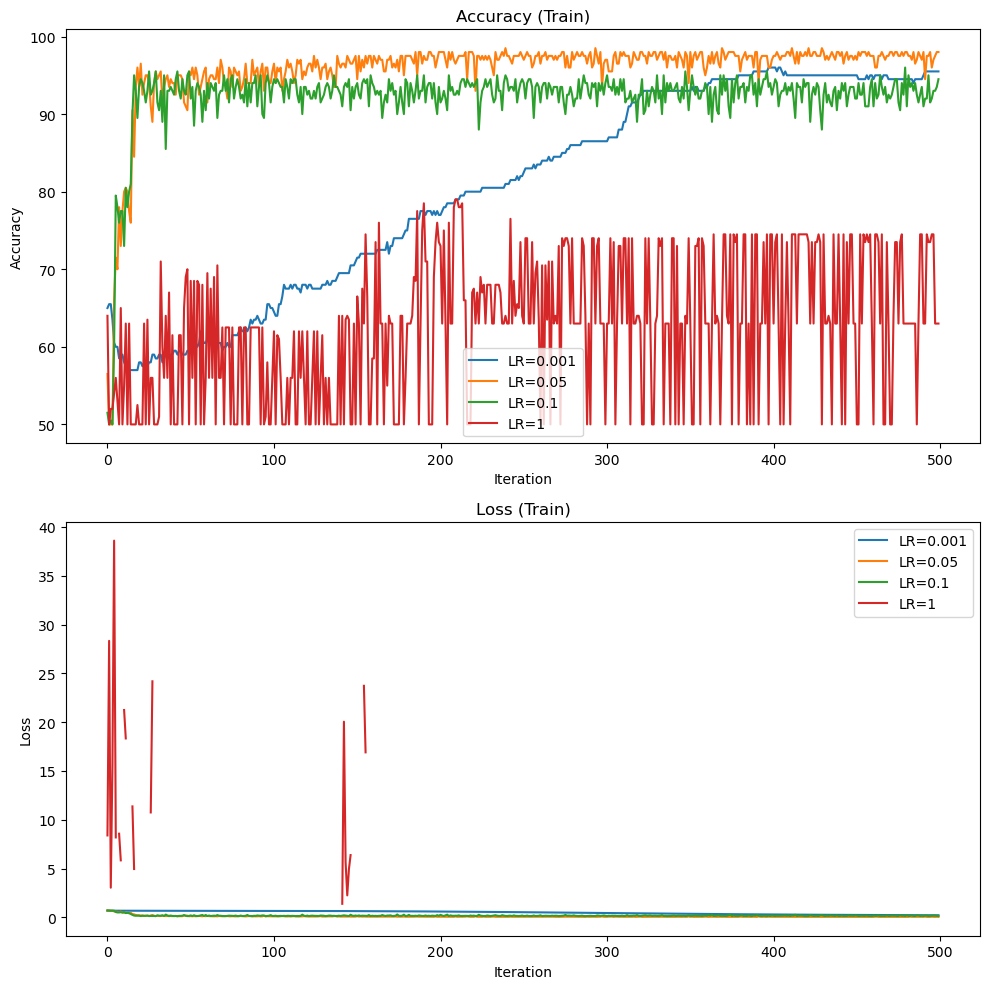

In [11]:
# Initialize data, parameters, and learning rates
def backward_bis(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    # Backward pass
    grad_htilde = torch.mm((outputs["yhat"] - Y), params['Wy'].t()) * (1 - outputs['h']**2)
    grads["Wy"] = torch.mm((outputs["yhat"] - Y).t(),outputs["h"]).t()/ bsize
    grads["Wh"] = torch.mm(grad_htilde.t(),outputs["X"]).t() / bsize
    grads["by"] = (outputs["yhat"] - Y).sum(axis=0) / bsize
    grads["bh"] = grad_htilde.sum(axis=0) / bsize

    return grads
data = CirclesData()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
learning_rates = [0.001, 0.05, 0.1, 1]  # List of learning rates to test

curves = {lr: [[], [], [], []] for lr in learning_rates}

num_iterations = 150

for lr in learning_rates:
    params = init_params(nx, nh, ny)  # Initialize parameters for each batch size

    for iteration in range(500):
        perm = np.random.permutation(N)
        Xtrain = data.Xtrain[perm, :]
        Ytrain = data.Ytrain[perm, :]

        for j in range(N // Nbatch):
            indsBatch = range(j * Nbatch, (j + 1) * Nbatch)
            X = Xtrain[indsBatch, :]
            Y = Ytrain[indsBatch, :]

            # Forward pass
            Yhat, outputs = forward(params, X)

            # Calculate loss and accuracy
            L, acc = loss_accuracy(Yhat, Y)

            # Backward pass
            grads = backward(params, outputs, Y)

            # Update parameters using SGD
            params = sgd(params, grads, lr)
        Yhat_train, _ = forward(params, data.Xtrain)
        Yhat_test, _ = forward(params, data.Xtest)
        Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
        Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)

        curves[lr][0].append(acctrain)
        curves[lr][1].append(acctest)
        curves[lr][2].append(Ltrain.detach().numpy())
        curves[lr][3].append(Ltest.detach().numpy())

        title = f"LR: {lr}, Iter {iteration + 1}: Acc train {acctrain:.1f}% ({Ltrain:.2f}), acc test {acctest:.1f}% ({Ltest:.2f})"
# Plot the results for each learning rate
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
for lr, curve in curves.items():
    axes[0].plot(curve[0], label=f"LR={lr}")
    axes[1].plot(curve[2], label=f"LR={lr}")

axes[0].set_title("Accuracy (Train)")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

axes[1].set_title("Loss (Train)")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.savefig("manual_lr.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Part 2 : Simplification of the backward pass with `torch.autograd`

In [12]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights

    params["Wh"] = 0.3 * torch.randn(nh, nx)
    params["Wy"] = 0.3 * torch.randn(ny, nh)
    params["bh"] = 0.3 * torch.randn(1, nh)
    params["by"] = 0.3 * torch.randn(1, ny)

    params["Wh"].requires_grad_()
    params["Wy"].requires_grad_()
    params["bh"].requires_grad_()
    params["by"].requires_grad_()

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part.

The function `backward` is no longer used because of "autograd".

In [13]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
        params["Wy"] -= eta * params["Wy"].grad
        params["Wh"] -= eta * params["Wh"].grad
        params["by"] -= eta * params["by"].grad
        params["bh"] -= eta * params["bh"].grad

        # Reset to zero
        params["Wy"].grad.zero_()
        params["Wh"].grad.zero_()
        params["by"].grad.zero_()
        params["bh"].grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

#### Global learning procedure with autograd

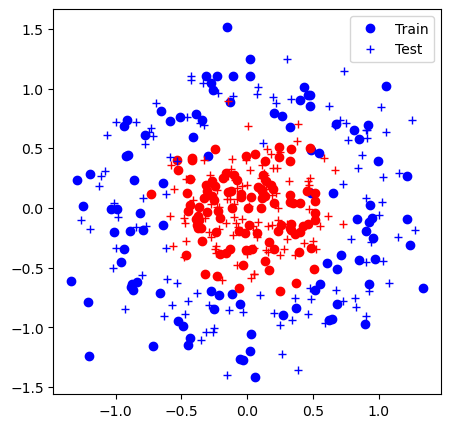

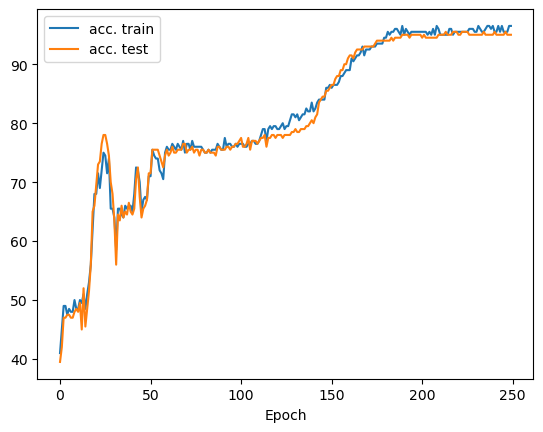

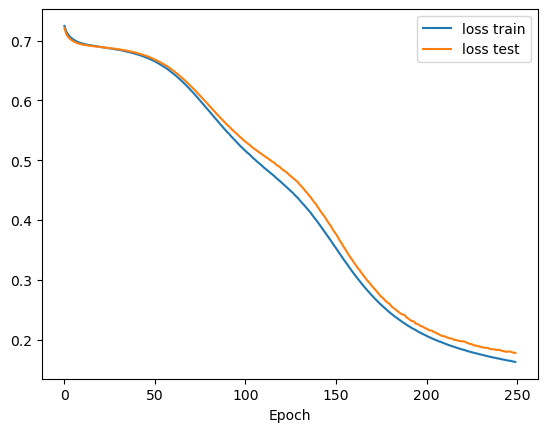

In [14]:
verbose = False

# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03
n_iter = 250

params = init_params(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(n_iter):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd

        Yhat, outputs = forward(params, X)
        L, acc = loss_accuracy(Yhat, Y)
        L.backward()
        params = sgd(params, eta)

    ####################
    ##      END        #
    ####################

    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest)
    
    if verbose:
        print(title)
        # detach() is used to remove the predictions from the computational graph in autograd
        data.plot_data_with_grid(Ygrid.detach(), title)        

    curves[0].append(acctrain.item())
    curves[1].append(acctest.item())
    curves[2].append(Ltrain.item())
    curves[3].append(Ltest.item())

# Plot accuracy progress
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Plot loss progress
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [15]:
print(f'Maxixum accuracy on test set: {max(curves[1])}')

Maxixum accuracy on test set: 95.5


### Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [16]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        torch.nn.Softmax(dim=1)
    )
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      END        #
    ####################

    return model, loss

In [17]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    L = loss(Yhat, Y)
    acc = (torch.sum(torch.argmax(Yhat, dim=1) == torch.argmax(Y, dim=1)) / Y.size(0)) * 100

    ####################
    ##      END        #
    ####################

    return L, acc

In [18]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad
            param.grad.zero_()

    ####################
    ##      END        #
    ####################
    return model

#### Global learning procedure with autograd and `torch.nn`

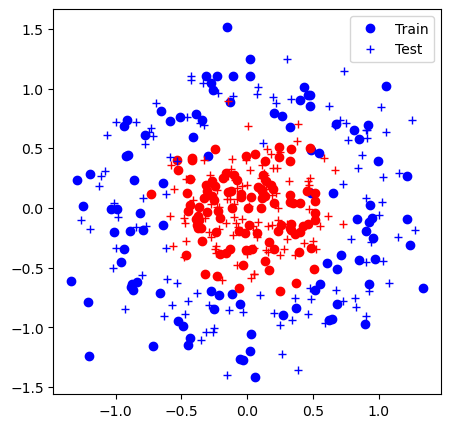

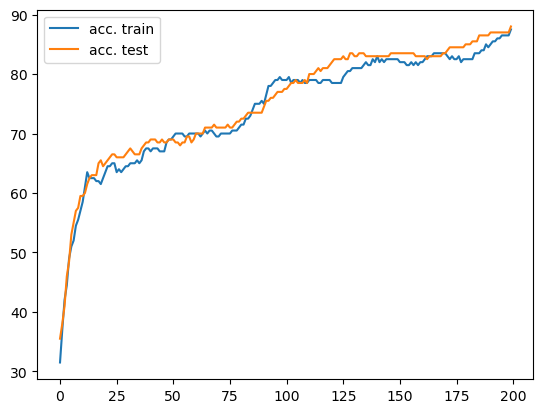

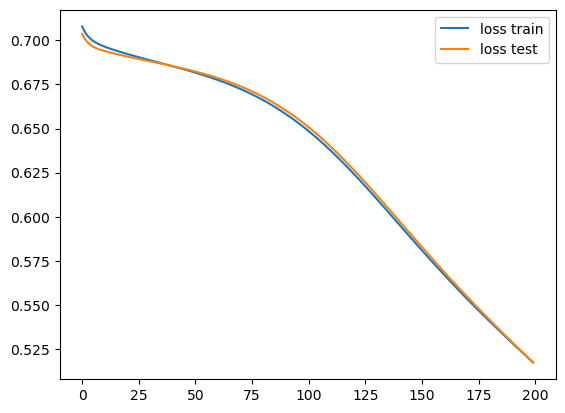

In [19]:
verbose = False

# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03
n_iter = 200

model, loss = init_model(nx, nh, ny)

curves = [[], [], [], []]

# epoch
for iteration in range(n_iter):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta=eta)

    ####################
    ##      END        #
    ####################

    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest)
    
    if verbose:
        print(title)
        data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain.item())
    curves[1].append(acctest.item())
    curves[2].append(Ltrain.item())
    curves[3].append(Ltest.item())

# Plot accuracy progress
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.legend()
plt.show()

# Plot loss progress
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

### Part 4 : Simplification of the SGD with `torch.optim`

In [20]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny),
        torch.nn.Softmax(dim=1)
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after.

#### Algorithme global d"apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

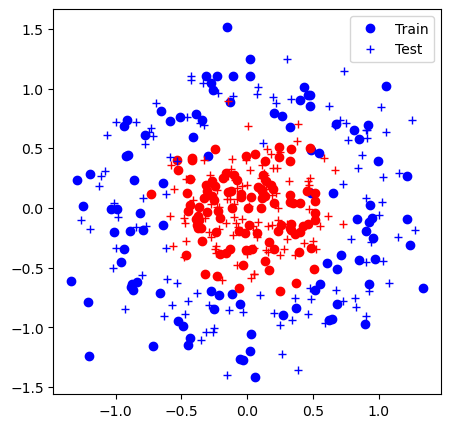

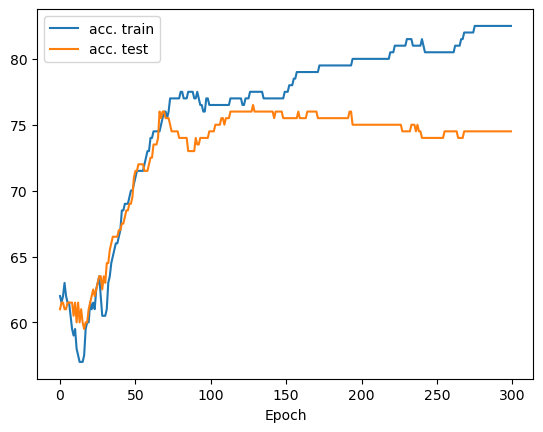

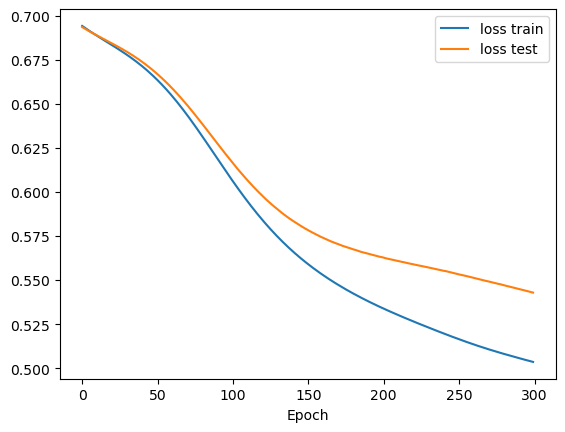

Maxixum accuracy on test set: 76.5


In [21]:
verbose = False

# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03
n_iter = 300

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[], [], [], []]

# epoch
for iteration in range(n_iter):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

        optim.zero_grad()
        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        optim.step()

    ####################
    ##      FIN        #
    ####################

    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)

    title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
        iteration, acctrain, Ltrain, acctest, Ltest)
    
    if verbose:
        print(title)
        data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)        

    curves[0].append(acctrain.item())
    curves[1].append(acctest.item())
    curves[2].append(Ltrain.item())
    curves[3].append(Ltest.item())

# Plot accuracy progress
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.legend()
plt.xlabel("Epoch")
plt.show()

# Plot loss progress
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.xlabel("Epoch")
plt.show()

print(f'Maxixum accuracy on test set: {max(curves[1])}')

### Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

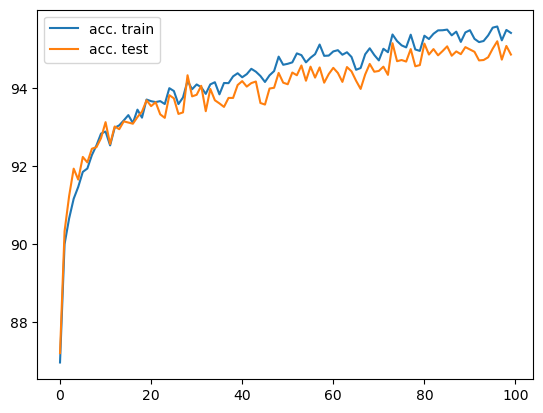

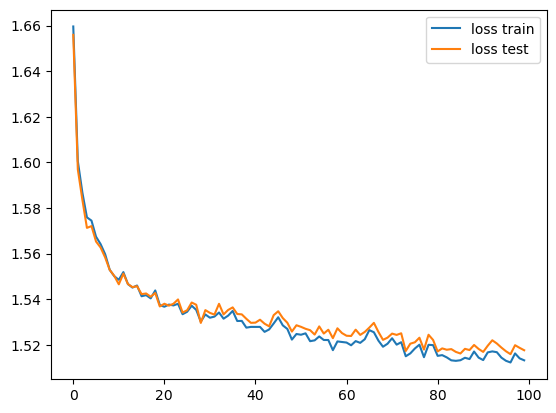

In [22]:
# Apply the code from the previous part to the MNIST dataset
verbose = False

# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03
n_iter = 100

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[], [], [], []]

# epoch
for iteration in range(n_iter):
    
        # permute
        perm = np.random.permutation(N)
        Xtrain = data.Xtrain[perm, :]
        Ytrain = data.Ytrain[perm, :]
    
        #####################
        ## Your code  here ##
        #####################
        # batches
        for j in range(N // Nbatch):
    
            indsBatch = range(j * Nbatch, (j+1) * Nbatch)
            X = Xtrain[indsBatch, :]
            Y = Ytrain[indsBatch, :]
    
            # write the optimization algorithm on the batch (X,Y)
            # using the functions: loss_accuracy
            # the forward with the predict method from the model
            # the backward function with autograd
            # and then an optimization step
    
            optim.zero_grad()
            Yhat = model(X)
            L, acc = loss_accuracy(loss, Yhat, Y)
            L.backward()
            optim.step()
    
        ####################
        ##      FIN        #
        ####################
    
        Yhat_train = model(data.Xtrain)
        Yhat_test = model(data.Xtest)
        Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
        Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    
        title = "Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})".format(
            iteration, acctrain, Ltrain, acctest, Ltest)
        
        if verbose:
            print(title)
    
        curves[0].append(acctrain.item())
        curves[1].append(acctest.item())
        curves[2].append(Ltrain.item())
        curves[3].append(Ltest.item())

# Plot accuracy progress
fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.legend()
plt.show()

# Plot loss progress
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

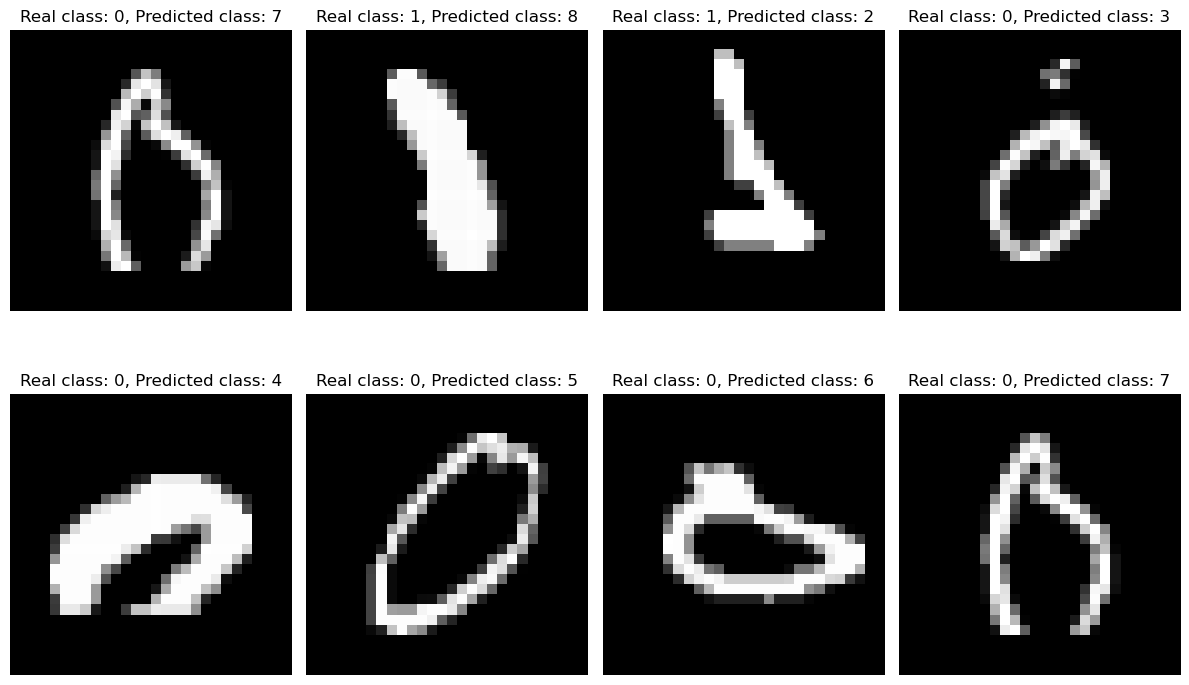

In [23]:
# Find misclassified data
mismatches = ((data.Ytest != Yhat_test.round()).float()).argmax(dim=0)

# Create subplots for the first 8 misclassified data
n_rows = 2
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
axes = axes.ravel()
for i, ax in enumerate(axes):
    idx = mismatches[i]
    ax.imshow(data.Xtest[idx].reshape((28, 28)), cmap="gray")
    ax.set_title(f"Real class: {data.Ytest[idx].argmax()}, Predicted class: {Yhat_test[idx].argmax()}")
    ax.axis("off")

plt.tight_layout()
plt.show()

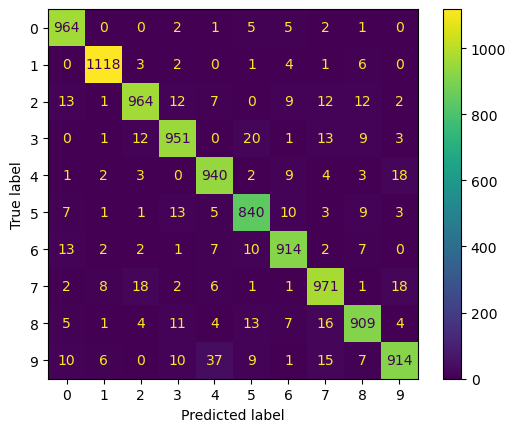

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(data.Ytest.argmax(dim=1), Yhat_test.detach().argmax(dim=1))

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig("mnist_cm.pdf", format="pdf", bbox_inches="tight")

### Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas :
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [25]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()


def plot_svm_predictions(data, predictions):
    plt.figure(2)
    plt.clf()
    plt.imshow(np.reshape(predictions, (40, 40)))
    plt.plot(data._Xtrain[data._Ytrain[:, 0] == 1, 0]*10+20,
             data._Xtrain[data._Ytrain[:, 0] == 1, 1]*10+20, "bo", label="Train")
    plt.plot(data._Xtrain[data._Ytrain[:, 1] == 1, 0]*10+20,
             data._Xtrain[data._Ytrain[:, 1] == 1, 1]*10+20, "ro")
    plt.plot(data._Xtest[data._Ytest[:, 0] == 1, 0]*10+20,
             data._Xtest[data._Ytest[:, 0] == 1, 1]*10+20, "b+", label="Test")
    plt.plot(data._Xtest[data._Ytest[:, 1] == 1, 0]*10+20,
             data._Xtest[data._Ytest[:, 1] == 1, 1]*10+20, "r+")
    plt.xlim(0, 39)
    plt.ylim(0, 39)
    plt.clim(0.3, 0.7)
    plt.draw()
    plt.pause(1e-3)
    plt.show()

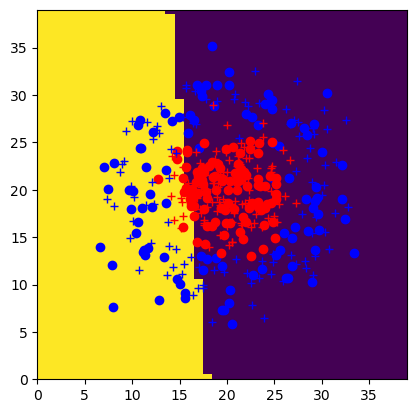

Accuracy : 62.00


In [26]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
# See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = sklearn.svm.SVC(kernel='linear', C=1)
svm.fit(Xtrain, Ytrain)
predictions = svm.predict(Xgrid)

# Results
plot_svm_predictions(data, predictions)
Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)

###########################

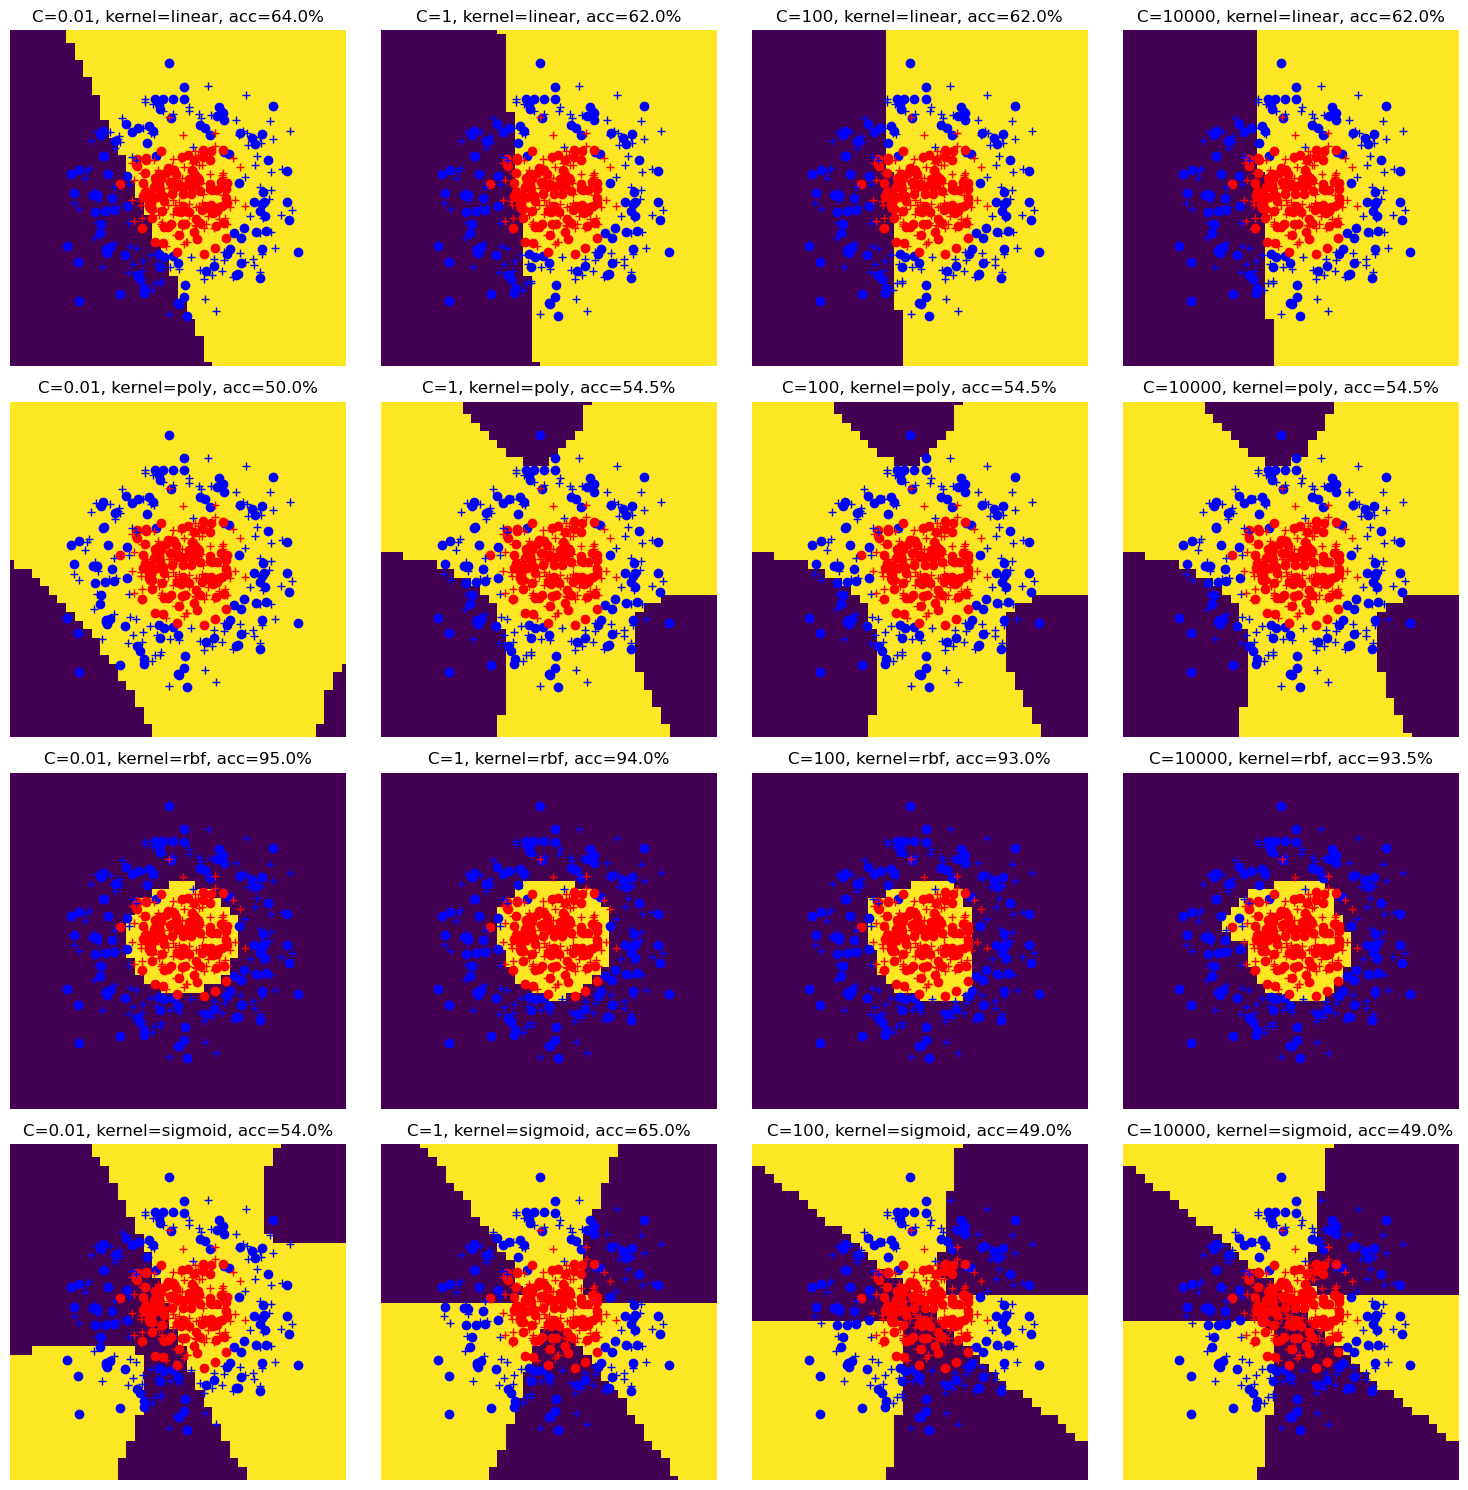

In [27]:
# Perform a grid search for different values of C and different kernels
# plot the results and the accuracy for each configuration on subplots

C_values = [0.01, 1, 100, 10000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fig, axes = plt.subplots(nrows=len(C_values), ncols=len(kernels), figsize=(15, 15))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        svm = sklearn.svm.SVC(kernel=kernel, C=C)
        svm.fit(Xtrain, Ytrain)
        predictions = svm.predict(Xgrid)
        plt.subplot(len(C_values), len(kernels), i*len(kernels) + j + 1)
        plt.imshow(1-np.reshape(predictions, (40, 40)))
        plt.plot(data._Xtrain[data._Ytrain[:, 0] == 1, 0]*10+20,
                 data._Xtrain[data._Ytrain[:, 0] == 1, 1]*10+20, "bo", label="Train")
        plt.plot(data._Xtrain[data._Ytrain[:, 1] == 1, 0]*10+20,
                    data._Xtrain[data._Ytrain[:, 1] == 1, 1]*10+20, "ro")
        plt.plot(data._Xtest[data._Ytest[:, 0] == 1, 0]*10+20,
                    data._Xtest[data._Ytest[:, 0] == 1, 1]*10+20, "b+", label="Test")
        plt.plot(data._Xtest[data._Ytest[:, 1] == 1, 0]*10+20,
                    data._Xtest[data._Ytest[:, 1] == 1, 1]*10+20, "r+")
        plt.xlim(0, 39)
        plt.ylim(0, 39)
        plt.clim(0.3, 0.7)
        plt.title(f"C={C}, kernel={kernel}, acc={100*svm.score(Xtest, Ytest):.1f}%")
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.draw()

plt.tight_layout()
plt.show()
        

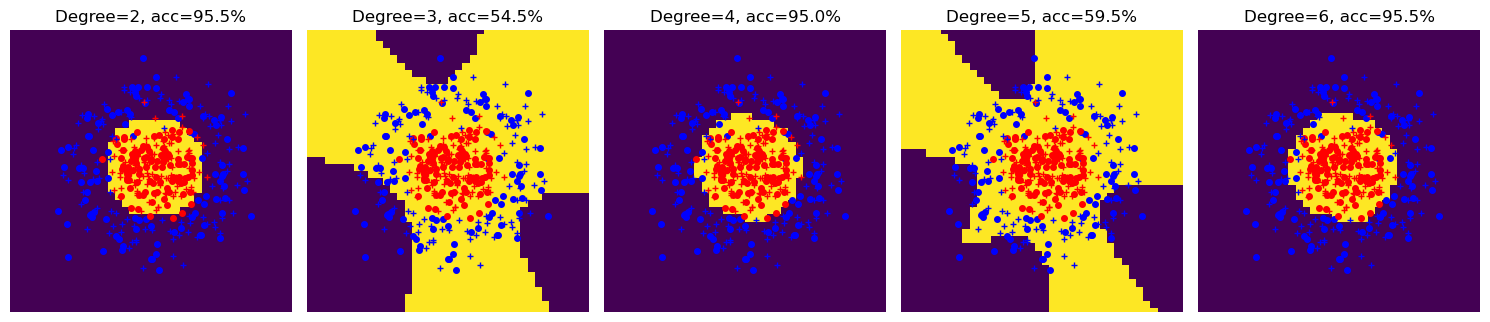

In [28]:
# Do the same but for C=1, kernel=polynomial and different degrees
# plot the results and the accuracy for each configuration on subplots

degrees = [2, 3, 4, 5, 6]

fig, axes = plt.subplots(nrows=1, ncols=len(degrees), figsize=(15, 5))

for i, degree in enumerate(degrees):
    svm = sklearn.svm.SVC(kernel='poly', C=1, degree=degree)
    svm.fit(Xtrain, Ytrain)
    predictions = svm.predict(Xgrid)
    plt.subplot(1, len(degrees), i + 1)
    plt.imshow(1-np.reshape(predictions, (40, 40)))
    plt.plot(data._Xtrain[data._Ytrain[:, 0] == 1, 0]*10+20,
             data._Xtrain[data._Ytrain[:, 0] == 1, 1]*10+20, "bo", label="Train", markersize=4)
    plt.plot(data._Xtrain[data._Ytrain[:, 1] == 1, 0]*10+20,
                data._Xtrain[data._Ytrain[:, 1] == 1, 1]*10+20, "ro", markersize=4)
    plt.plot(data._Xtest[data._Ytest[:, 0] == 1, 0]*10+20,
                data._Xtest[data._Ytest[:, 0] == 1, 1]*10+20, "b+", label="Test", markersize=4)
    plt.plot(data._Xtest[data._Ytest[:, 1] == 1, 0]*10+20,
                data._Xtest[data._Ytest[:, 1] == 1, 1]*10+20, "r+", markersize=4)
    plt.xlim(0, 39)
    plt.ylim(0, 39)
    plt.clim(0.3, 0.7)
    plt.title(f"Degree={degree}, acc={100*svm.score(Xtest, Ytest):.1f}%")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.draw()

plt.tight_layout()
plt.show()

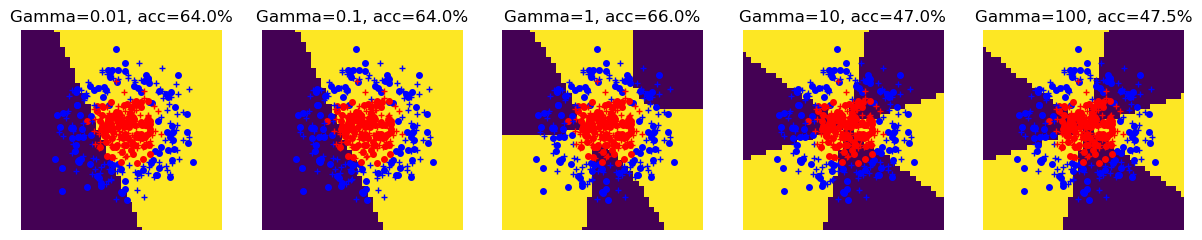

In [29]:
# Do the same with C=1, kernel=sigmoid and different values for gamma
# plot the results and the accuracy for each configuration on subplots

gammas = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(nrows=1, ncols=len(gammas), figsize=(15, 5))

for i, gamma in enumerate(gammas):
    svm = sklearn.svm.SVC(kernel='sigmoid', C=1, gamma=gamma)
    svm.fit(Xtrain, Ytrain)
    predictions = svm.predict(Xgrid)
    plt.subplot(1, len(gammas), i + 1)
    plt.imshow(1-np.reshape(predictions, (40, 40)))
    plt.plot(data._Xtrain[data._Ytrain[:, 0] == 1, 0]*10+20,
             data._Xtrain[data._Ytrain[:, 0] == 1, 1]*10+20, "bo", label="Train", markersize=4)
    plt.plot(data._Xtrain[data._Ytrain[:, 1] == 1, 0]*10+20,
                data._Xtrain[data._Ytrain[:, 1] == 1, 1]*10+20, "ro", markersize=4)
    plt.plot(data._Xtest[data._Ytest[:, 0] == 1, 0]*10+20,
                data._Xtest[data._Ytest[:, 0] == 1, 1]*10+20, "b+", label="Test", markersize=4)
    plt.plot(data._Xtest[data._Ytest[:, 1] == 1, 0]*10+20,
                data._Xtest[data._Ytest[:, 1] == 1, 1]*10+20, "r+", markersize=4)
    plt.xlim(0, 39)
    plt.ylim(0, 39)
    plt.clim(0.3, 0.7)
    plt.title(f"Gamma={gamma}, acc={100*svm.score(Xtest, Ytest):.1f}%")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.draw()

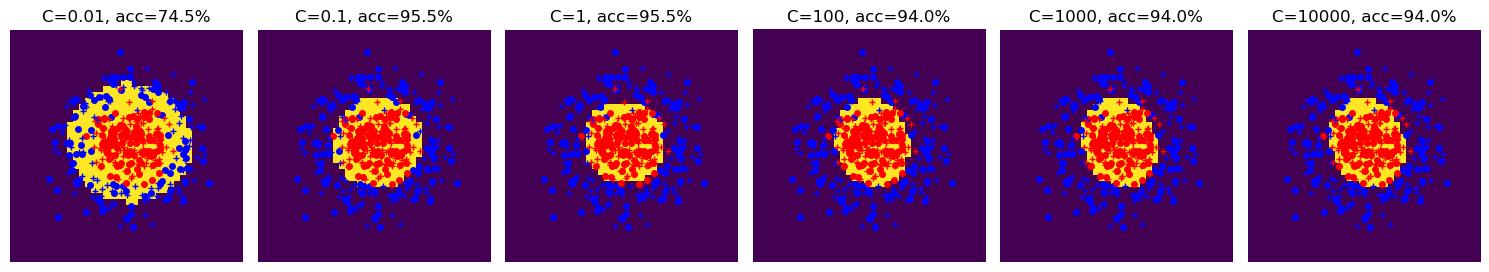

In [30]:
# Keep polynomial of degree 2 as kernel, experiment with different values of C

C_values = [0.01, 0.1, 1, 100, 1000, 10000]

fig, axes = plt.subplots(nrows=1, ncols=len(C_values), figsize=(15, 5))

for i, C in enumerate(C_values):
    svm = sklearn.svm.SVC(kernel='poly', C=C, degree=2)
    svm.fit(Xtrain, Ytrain)
    predictions = svm.predict(Xgrid)
    plt.subplot(1, len(C_values), i + 1)
    plt.imshow(1-np.reshape(predictions, (40, 40)))
    plt.plot(data._Xtrain[data._Ytrain[:, 0] == 1, 0]*10+20,
             data._Xtrain[data._Ytrain[:, 0] == 1, 1]*10+20, "bo", label="Train", markersize=4)
    plt.plot(data._Xtrain[data._Ytrain[:, 1] == 1, 0]*10+20,
                data._Xtrain[data._Ytrain[:, 1] == 1, 1]*10+20, "ro", markersize=4)
    plt.plot(data._Xtest[data._Ytest[:, 0] == 1, 0]*10+20,
                data._Xtest[data._Ytest[:, 0] == 1, 1]*10+20, "b+", label="Test", markersize=4)
    plt.plot(data._Xtest[data._Ytest[:, 1] == 1, 0]*10+20,
                data._Xtest[data._Ytest[:, 1] == 1, 1]*10+20, "r+", markersize=4)
    plt.xlim(0, 39)
    plt.ylim(0, 39)
    plt.clim(0.3, 0.7)
    plt.title(f"C={C}, acc={100*svm.score(Xtest, Ytest):.1f}%")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.draw()

plt.tight_layout()
plt.show()
